In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect('C:/Users/dakot/Desktop/DataScience/Project Scrap work/trulia_project/trulia_sb_house_data.db')

df = pd.read_sql_query("SELECT * FROM trulia_house_SB_data_cleaned", conn)

In [3]:
df.head()
df.columns


Index(['level_0', 'index', 'price', 'address', 'zip', 'num_bedrooms',
       'num_baths', 'building_sqft', 'year_built', 'lot_area',
       'home_description', 'feature_list', 'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito', 'building_sqft_was_missing'],
      dtype='object')

In [4]:
df.describe()

,level_0,index,price,num_bedrooms,num_baths,building_sqft,year_built,lot_area,house_age,has_garage,has_fireplace,has_ocean_views,has_mountain_views,has_hope_ranch,has_montecito,building_sqft_was_missing
count,904.000000,904.000000,9.040000e+02,904.000000,904.000000,748.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,634.753319,634.753319,2.689024e+06,3.613938,3.192257,2558.525401,1966.831858,0.837652,55.168142,0.390487,0.415929,0.112832,0.185841,0.045354,0.160398,0.172566
std,374.272474,374.272474,1.890863e+06,0.977184,1.388382,1405.497693,24.646975,1.571113,24.646975,0.488130,0.493154,0.316562,0.389193,0.208194,0.367178,0.378081
min,0.000000,0.000000,9.500000e+03,2.000000,1.500000,668.000000,1900.000000,0.000002,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.750000,308.750000,1.360000e+06,3.000000,2.000000,1563.750000,1956.000000,0.170000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,625.500000,625.500000,1.958000e+06,4.000000,3.000000,2185.000000,1963.000000,0.288246,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,958.250000,958.250000,3.453250e+06,4.000000,4.000000,3041.250000,1985.000000,1.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1296.000000,1296.000000,9.910000e+06,9.000000,11.000000,10823.000000,2021.000000,15.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.zip.value_counts()

93108    212
93105    166
93117    118
93110    103
93103     91
93111     91
93109     68
93101     53
93067      2
Name: zip, dtype: int64

In [6]:
numeric_cols=['price', 'num_bedrooms',
       'num_baths', 'building_sqft', 'lot_area',
        'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito','building_sqft_was_missing']

In [7]:
pair_cols=['price', 'num_bedrooms',
       'num_baths', 'building_sqft', 'lot_area',
        'house_age']

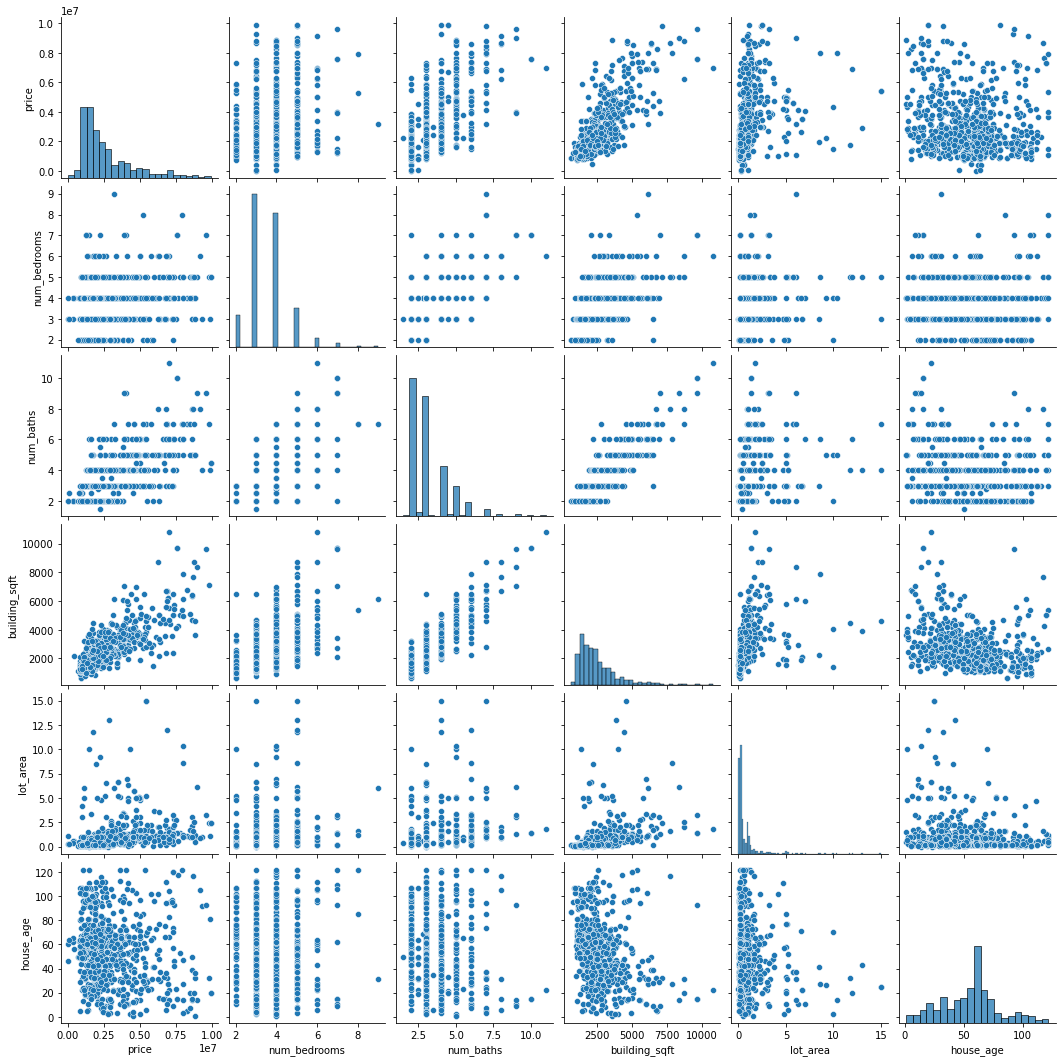

In [8]:
sns.pairplot(df[pair_cols])

Text(0.5, 1.0, 'house_age')

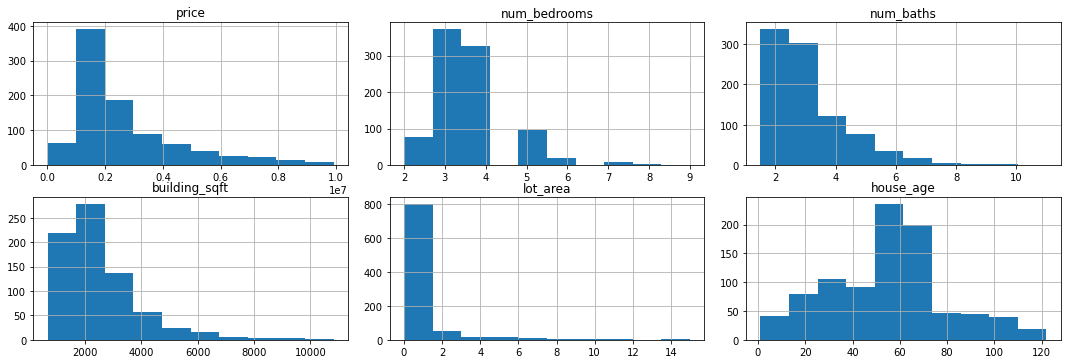

In [9]:
#seaborn subplots
fig,axes=plt.subplots(2,3,figsize=(15, 5),frameon=True)
fig.tight_layout()

df.price.hist(ax=axes[0,0])
axes[0,0].set_title(df.price.name)

df.num_bedrooms.hist(ax=axes[0,1])
axes[0,1].set_title(df.num_bedrooms.name)

df.num_baths.hist(ax=axes[0,2])
axes[0,2].set_title(df.num_baths.name)

df.building_sqft.hist(ax=axes[1,0])
axes[1,0].set_title(df.building_sqft.name)

df.lot_area.hist(ax=axes[1,1])
axes[1,1].set_title(df.lot_area.name)

df.house_age.hist(ax=axes[1,2])
axes[1,2].set_title(df.house_age.name)

<AxesSubplot:>

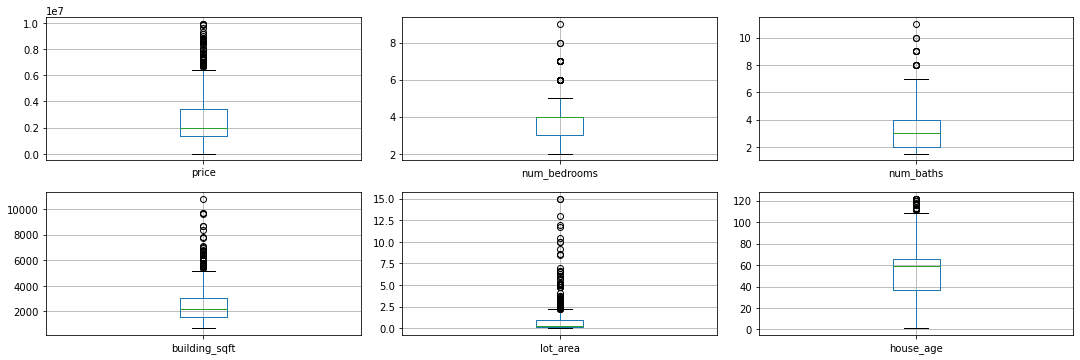

In [10]:
#seaborn subplots
fig,axes=plt.subplots(2,3,figsize=(15, 5),frameon=True)
fig.tight_layout()

df.boxplot(ax=axes[0,0],column='price')
#axes[0,0].set_title(df.price.name)

df.boxplot(ax=axes[0,1],column='num_bedrooms')
#axes[0,1].set_title(df.num_bedrooms.name)

df.boxplot(ax=axes[0,2],column='num_baths')
#axes[0,2].set_title(df.num_baths.name)

df.boxplot(ax=axes[1,0],column='building_sqft')
#axes[1,0].set_title(df.building_sqft.name)

df.boxplot(ax=axes[1,1],column='lot_area')
#axes[1,1].set_title(df.lot_area.name)

df.boxplot(ax=axes[1,2],column='house_age')
#axes[1,2].set_title(df.house_age.name)

In [11]:
df[numeric_cols].corr()

,price,num_bedrooms,num_baths,building_sqft,lot_area,house_age,has_garage,has_fireplace,has_ocean_views,has_mountain_views,has_hope_ranch,has_montecito,building_sqft_was_missing
price,1.000000,0.312906,0.710083,0.804780,0.373291,-0.142583,-0.130909,-0.035623,0.186918,0.068528,0.119762,0.461281,0.166124
num_bedrooms,0.312906,1.000000,0.608599,0.545764,0.178212,-0.088343,-0.062035,-0.047892,0.069373,0.022883,0.058944,0.114134,0.015664
num_baths,0.710083,0.608599,1.000000,0.883353,0.363656,-0.237378,-0.105179,-0.030389,0.177359,0.095711,0.092399,0.335892,0.102970
building_sqft,0.804780,0.545764,0.883353,1.000000,0.401836,-0.312394,-0.109649,-0.010565,0.236669,0.122335,0.129880,0.385317,NaN
lot_area,0.373291,0.178212,0.363656,0.401836,1.000000,-0.216500,-0.047455,-0.085004,0.116910,0.165469,0.149461,0.085656,0.157933
house_age,-0.142583,-0.088343,-0.237378,-0.312394,-0.216500,1.000000,-0.010066,0.010093,-0.082202,-0.133024,0.003044,-0.053032,0.023741
has_garage,-0.130909,-0.062035,-0.105179,-0.109649,-0.047455,-0.010066,1.000000,0.212432,0.029888,0.031468,-0.065491,-0.040907,-0.119507
has_fireplace,-0.035623,-0.047892,-0.030389,-0.010565,-0.085004,0.010093,0.212432,1.000000,0.011174,0.139191,-0.032931,0.047032,-0.171560
has_ocean_views,0.186918,0.069373,0.177359,0.236669,0.116910,-0.082202,0.029888,0.011174,1.000000,-0.008591,-0.027323,0.139476,-0.042579
has_mountain_views,0.068528,0.022883,0.095711,0.122335,0.165469,-0.133024,0.031468,0.139191,-0.008591,1.000000,0.005201,0.000411,-0.082719


<AxesSubplot:>

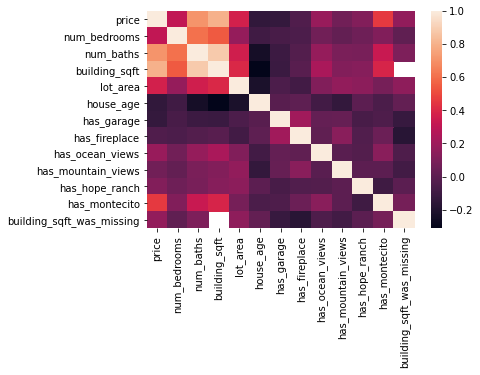

In [12]:
sns.heatmap(df[numeric_cols].corr())

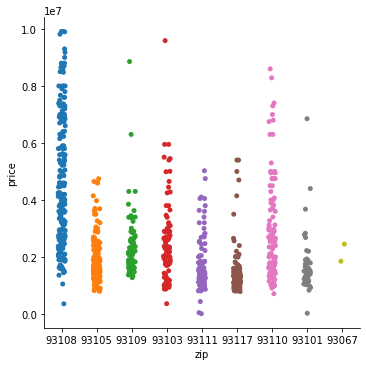

In [13]:
sns.catplot(x="zip", y='price', data=df)


<AxesSubplot:xlabel='zip', ylabel='price'>

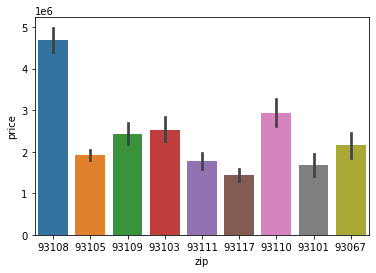

In [14]:
sns.barplot(x="zip", y="price", data=df)

In [16]:
pd.pivot_table(df, index='zip', values='price')

,price
zip,
93067,2.150000e+06
93101,1.673449e+06
93103,2.532628e+06
93105,1.922125e+06
93108,4.686157e+06
93109,2.414750e+06
93110,2.929883e+06
93111,1.764168e+06
93117,1.426758e+06


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


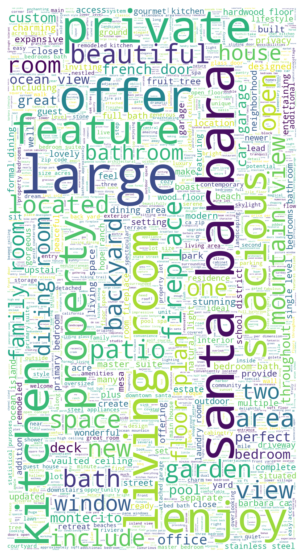

In [32]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


words=" ".join(df.home_description)

def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered=punctuation_stop(words)

unwanted=['home']
text=" ".join([ele for ele in words_filtered if ele not in unwanted])

wc=WordCloud(background_color="white", stopwords=STOPWORDS, max_words=2000, width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()